# PGP AI - Natural Language Processing

## Project 2: Help Twitter Combat Hate Speech Using NLP and Machine Learning

> ### Author:
>
> ***Saikat Narayan Bhattacharjya***
>
>  ***Email: <snbhattacharjya@gmail.com>***

### DESCRIPTION

Using NLP and ML, make a model to identify hate speech (racist or sexist tweets) in Twitter.

### Problem Statement:  

Twitter is the biggest platform where anybody and everybody can have their views heard. Some of these voices spread hate and negativity. Twitter is wary of its platform being used as a medium  to spread hate. 

You are a data scientist at Twitter, and you will help Twitter in identifying the tweets with hate speech and removing them from the platform. You will use NLP techniques, perform specific cleanup for tweets data, and make a robust model.


### Domain: Social Media

### Analysis to be done: 

Clean up tweets and build a classification model by using NLP techniques, cleanup specific for tweets data, regularization and hyperparameter tuning using stratified k-fold and cross validation to get the best model

### Content: 

1. id: identifier number of the tweet
2. Label: 0 (non-hate) /1 (hate)
3. Tweet: the text in the tweet


### Tasks: 

1. Load the tweets file using read_csv function from Pandas package.
2. Get the tweets into a list for easy text cleanup and manipulation.
3. To cleanup: 
    1. Normalize the casing.
    2. Using regular expressions, remove user handles. These begin with '@’.
    3. Using regular expressions, remove URLs.
    4. Using TweetTokenizer from NLTK, tokenize the tweets into individual terms.
    5. Remove stop words.
    6. Remove redundant terms like ‘amp’, ‘rt’, etc.
    7. Remove ‘#’ symbols from the tweet while retaining the term.
4. Extra cleanup by removing terms with a length of 1.
5. Check out the top terms in the tweets:
    1. First, get all the tokenized terms into one large list.
    2. Use the counter and find the 10 most common terms.
6. Data formatting for predictive modeling:
    1. Join the tokens back to form strings. This will be required for the vectorizers.
    2. Assign x and y.
    3. Perform train_test_split using sklearn.
7. We’ll use TF-IDF values for the terms as a feature to get into a vector space model.
    1. Import TF-IDF  vectorizer from sklearn.
    2. Instantiate with a maximum of 5000 terms in your vocabulary.
    3. Fit and apply on the train set.
    4. Apply on the test set.
8. Model building: Ordinary Logistic Regression
    1. Instantiate Logistic Regression from sklearn with default parameters.
    2. Fit into  the train data.
    3. Make predictions for the train and the test set.
9. Model evaluation: Accuracy, recall, and f_1 score.
    1. Report the accuracy on the train set.
    2. Report the recall on the train set: decent, high, or low.
    3. Get the f1 score on the train set.
10.	Looks like you need to adjust the class imbalance, as the model seems to focus on the 0s.
    1. Adjust the appropriate class in the LogisticRegression model.
11.	Train again with the adjustment and evaluate.
    1. Train the model on the train set.
    2. Evaluate the predictions on the train set: accuracy, recall, and f_1 score.
12.	Regularization and Hyperparameter tuning:
    1. Import GridSearch and StratifiedKFold because of class imbalance.
    2. Provide the parameter grid to choose for ‘C’ and ‘penalty’ parameters.
    3. Use a balanced class weight while instantiating the logistic regression.
13.	Find the parameters with the best recall in cross-validation.
    1. Choose ‘recall’ as the metric for scoring.
    2. Choose a stratified 4 fold cross-validation scheme.
    3. Fit into  the train set.
14.	What are the best parameters?
15.	Predict and evaluate using the best estimator.
    1. Use the best estimator from the grid search to make predictions on the test set.
    2. What is the recall on the test set for the toxic comments?
    3. What is the f_1 score?

In [2]:
import numpy as np
import pandas as pd
import nltk
from pprint import pprint

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
tweet_data = pd.read_csv('TwitterHate.csv')
tweet_data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [5]:
tweets = tweet_data['tweet'].to_list()
tweets[:5]

[' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 '  bihday your majesty',
 '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ',
 ' factsguide: society now    #motivation']

In [6]:
import re
from nltk.tokenize import TweetTokenizer

def basic_tweet_cleanup(tweets):
    #Lower casing
    tweets = [tweet.lower() for tweet in tweets]
    
    #Removing @
    tweets = [re.sub('@\S+\s+','',tweet) for tweet in tweets]
    
    #Removing URL 
    tweets = [re.sub('http\S://\S+','',tweet) for tweet in tweets]
    
    #Remove ‘#’ symbols from the tweet while retaining the term.
    tweets = [re.sub('#','',tweet) for tweet in tweets]
      
    #Using TweetTokenizer from NLTK, tokenize the tweets into individual terms.
    tweet_tokenizer = TweetTokenizer()
    tweets = [tweet_tokenizer.tokenize(tweet) for tweet in tweets]
    
    #Remove stop words
    tweets = [[token for token in tweet if token not in nltk.corpus.stopwords.words('english')] for tweet in tweets]
    
    return tweets

In [8]:
%%time
tweets_cleaned = basic_tweet_cleanup(tweets)
pprint(tweets_cleaned[:5], compact=True)

[['father', 'dysfunctional', 'selfish', 'drags', 'kids', 'dysfunction', '.',
  'run'],
 ['thanks', 'lyft', 'credit', "can't", 'use', 'cause', 'offer', 'wheelchair',
  'vans', 'pdx', '.', 'disapointed', 'getthanked'],
 ['bihday', 'majesty'],
 ['model', 'love', 'u', 'take', 'u', 'time', 'urð', '\x9f', '\x93', '±', '!',
  '!', '!', 'ð', '\x9f', '\x98', '\x99', 'ð', '\x9f', '\x98', '\x8e', 'ð',
  '\x9f', '\x91', '\x84', 'ð', '\x9f', '\x91', 'ð', '\x9f', '\x92', '¦', 'ð',
  '\x9f', '\x92', '¦', 'ð', '\x9f', '\x92', '¦'],
 ['factsguide', ':', 'society', 'motivation']]
Wall time: 1min 36s


In [9]:
pprint(tweets[:5], compact=True)

[' @user when a father is dysfunctional and is so selfish he drags his kids '
 'into his dysfunction.   #run',
 "@user @user thanks for #lyft credit i can't use cause they don't offer "
 'wheelchair vans in pdx.    #disapointed #getthanked',
 '  bihday your majesty',
 '#model   i love u take with u all the time in urð\x9f\x93±!!! '
 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85'
 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ',
 ' factsguide: society now    #motivation']


Advanced Cleanup

In [10]:
def advanced_tweet_cleanup(tweets):
    #Filtering only alphabet words with length > 1
    tweets_cleaned = [[token for token in tweet_tokens if token.isalpha() and len(token) > 1] for tweet_tokens in tweets]
    return tweets_cleaned

In [11]:
tweets_cleaned = advanced_tweet_cleanup(tweets_cleaned)
pprint(tweets_cleaned[:5], compact=True)

[['father', 'dysfunctional', 'selfish', 'drags', 'kids', 'dysfunction', 'run'],
 ['thanks', 'lyft', 'credit', 'use', 'cause', 'offer', 'wheelchair', 'vans',
  'pdx', 'disapointed', 'getthanked'],
 ['bihday', 'majesty'], ['model', 'love', 'take', 'time', 'urð'],
 ['factsguide', 'society', 'motivation']]


Joining the tokens in a list to find the top ten common terms

In [12]:
terms = []

for tweet in tweets_cleaned:
    for token in tweet:
        terms.append(token)

print("Total Tokens: {}".format(len(terms)))

Total Tokens: 236721


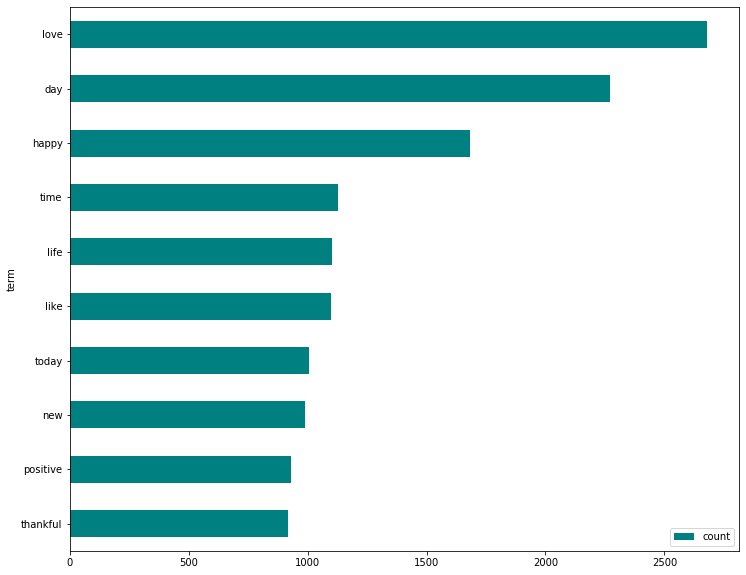

In [14]:
from collections import Counter

counts_terms = Counter(terms)
terms_df = pd.DataFrame(counts_terms.most_common(10), columns=['term', 'count'])
terms_df.sort_values(by='count', ascending=True).plot(kind="barh", x='term', figsize=(12,10), color='teal')
plt.show()

Adding tweets_cleaned to the data frame for vectorizers

In [18]:
tweets_cleaned_sent = []

for tweet in tweets_cleaned:
    sent = ""
    for token in tweet:
        sent = sent + token + " "
    tweets_cleaned_sent.append(sent[:-1])

tweets_cleaned_sent[:5]

['father dysfunctional selfish drags kids dysfunction run',
 'thanks lyft credit use cause offer wheelchair vans pdx disapointed getthanked',
 'bihday majesty',
 'model love take time urð',
 'factsguide society motivation']

In [20]:
tweet_data['tweet_cleaned'] = tweets_cleaned_sent
tweet_data.head(10)

,id,label,tweet,tweet_cleaned
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit use cause offer wheelchair ...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,model love take time urð
4,5,0,factsguide: society now #motivation,factsguide society motivation
5,6,0,[2/2] huge fan fare and big talking before the...,huge fan fare big talking leave chaos pay disp...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ
7,8,0,the next school year is the year for exams.ð...,next school year year exams think school exams...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,love land allin cavs champions cleveland cleve...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome


Assigning X and Y

In [ ]:
X = tweet_data['tweet_cleaned']
Y = tweet_data['label']